# PART 1 review online programming

## Dynamic Programming

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)

In [4]:
for i, p in enumerate(original_price):
    price[i+1] = p 

In [5]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [6]:
price[2]

5

In [7]:
def max_price(n):
    return max([price[n]] + [max_price(i) + max_price(n - i) for i in range(1,n) ])

In [8]:
max_price(13)

40

### Exploration Decorator

In [9]:
def add_ten(n):
    return n + 10

In [10]:
def mult_ten(n):
    return n * 10

In [11]:
def decorator(f,arg):
    return f(arg)

In [12]:
decorator(add_ten,10)

20

### recoding function result

In [13]:
import random
result = {}
def decorator_recoding_result(f,n):

    for i in range(n):
        choice_arg = random.choice([1,2,3,4])
        if (f.__name__,choice_arg) not in result:
            result[(f.__name__,choice_arg)] = 1
        else:
            result[(f.__name__,choice_arg)] += 1
        
    return result[(f.__name__,choice_arg)]

In [14]:
decorator_recoding_result(add_ten, 15)

4

In [15]:
result

{('add_ten', 3): 5, ('add_ten', 1): 5, ('add_ten', 2): 4, ('add_ten', 4): 1}

In [16]:
from functools import wraps

In [17]:
import random
result = {}
def decorator_recoding_result(f):
    @wraps(f)
    def _inner(arg):
        for i in range(arg):
            choice_arg = random.choice([1,2,3,4])
            if (f.__name__,choice_arg) not in result:
                result[(f.__name__,choice_arg)] = 1
            else:
                result[(f.__name__,choice_arg)] += 1
        
        print("the most time : {}".format(max(result.values())))
        return result
    return _inner

In [18]:
@decorator_recoding_result
def mult_ten(n):
    return n * 10

In [19]:
aa = mult_ten(10)

the most time : 4


In [20]:
aa

{('mult_ten', 3): 4,
 ('mult_ten', 4): 2,
 ('mult_ten', 1): 3,
 ('mult_ten', 2): 1}

### just do it once

In [101]:
def max_price(n):
    max_p, max_b = max(
        [price[n]] + [max_price(i) + max_price(n-i) for i in range(1,n) ]
    ) 

In [102]:
result_recoding = {}
do_times = {}
def do_it_once(f):
    @wraps(f)
    def _wrapper(arg):
        if (f.__name__, arg) not in do_times:
            do_times[(f.__name__, arg)] = 0
        if (f.__name__, arg) in result_recoding:
            return result_recoding[(f.__name__, arg)]
        else:
            result_recoding[(f.__name__, arg)] = f(arg)
            do_times[(f.__name__, arg)] += 1
            return result_recoding[(f.__name__, arg)]
    return _wrapper

In [103]:
max_split = {}

In [104]:
@do_it_once
def max_price(n):
    max_p, max_s = max([(price[n],0)] + [(max_price(i) + max_price(n - i),i) for i in range(1,n) ], key = lambda x:x[0])
    max_split[n] = (n - max_s, max_s)
    return max_p

In [105]:
max_price(234)

743

In [99]:
max_split

{16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),
 73: (72, 1),
 74: (72, 2),
 75: (72, 3),
 76: (66, 10),
 77: (66, 11),
 78: (77, 1),
 79: (77, 2),
 80: (77, 3),
 81: (79, 2),
 82: (80, 2),
 83: (77, 6),
 84: (83, 1),
 85: (83, 2),
 86: (83

In [29]:
result_recoding

{('max_price', 1): 1,
 ('max_price', 2): 5,
 ('max_price', 3): 8,
 ('max_price', 4): 10,
 ('max_price', 5): 13,
 ('max_price', 6): 17,
 ('max_price', 7): 18,
 ('max_price', 8): 22,
 ('max_price', 9): 25,
 ('max_price', 10): 30,
 ('max_price', 11): 35,
 ('max_price', 12): 36,
 ('max_price', 13): 40,
 ('max_price', 14): 43,
 ('max_price', 15): 45,
 ('max_price', 16): 48,
 ('max_price', 17): 52,
 ('max_price', 18): 53,
 ('max_price', 19): 57,
 ('max_price', 20): 60}

In [26]:
do_times

{('max_price', 20): 1,
 ('max_price', 1): 1,
 ('max_price', 19): 1,
 ('max_price', 18): 1,
 ('max_price', 17): 1,
 ('max_price', 16): 1,
 ('max_price', 15): 1,
 ('max_price', 14): 1,
 ('max_price', 13): 1,
 ('max_price', 12): 1,
 ('max_price', 11): 1,
 ('max_price', 10): 1,
 ('max_price', 9): 1,
 ('max_price', 8): 1,
 ('max_price', 7): 1,
 ('max_price', 6): 1,
 ('max_price', 5): 1,
 ('max_price', 4): 1,
 ('max_price', 3): 1,
 ('max_price', 2): 1}

In [29]:
print(len((1,2,3,4)))

4


### recoding the split plan

In [106]:
def split_plan(n):
    
    left_split, right_split = max_split[n]
    
    if right_split == 0 : return [left_split]
    
    return split_plan(left_split) + split_plan(right_split)

In [107]:
split_plan(234)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 3]

### function variable

In [116]:
def do_it_once(f):
    do_it_once.result_recoding = {}
    @wraps(f)
    def _wrapper(arg):
        if arg in do_it_once.result_recoding:
            return do_it_once.result_recoding[arg]
        else:
            do_it_once.result_recoding[arg] = f(arg)
            return do_it_once.result_recoding[arg]
    return _wrapper

In [117]:
max_split = {}

In [118]:
@do_it_once
def max_price(n):
    max_p, max_s = max([(price[n],0)] + [(max_price(i) + max_price(n - i),i) for i in range(1,n) ], key = lambda x:x[0])
    max_split[n] = (n - max_s, max_s)
    return max_p

In [119]:
max_price(10)

30

In [120]:
do_it_once.result_recoding

{1: 1, 2: 5, 3: 8, 4: 10, 5: 13, 6: 17, 7: 18, 8: 22, 9: 25, 10: 30}

# PART 2  change $loss = \frac{1}{n}\sum{(y_i - \hat{y_i})^2}$ to  $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [139]:
from sklearn.datasets import load_boston
import random

In [123]:
bt_data = load_boston()

In [125]:
X = bt_data.data[:,5]
y = bt_data.target

In [130]:
# loss2
def loss2(y , y_predict):
    return sum(abs(y_hat - y_predict_hat) for y_hat, y_predict_hat in zip(list(y), list(y_predict))) / len(list(y))

In [140]:
def price(rm, k, b):
    return k * rm + b

In [163]:
# K和B的导数
def partial_k(x, y , y_hat):
    n = len(y)
    gradient = 0
    gradient = sum( -x_i for y_hat_i, y_i, x_i in zip(y_hat, y, x) if y_i < y_hat_i )
    gradient += sum( x_i for y_hat_i, y_i, x_i in zip(y_hat, y, x) if y_i > y_hat_i )
    return - 1 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    gradient = 0
    gradient = sum( 1 for y_hat_i, y_i in zip(y_hat, y) if (y_i > y_hat_i) )
    gradient += sum( -1 for y_hat_i, y_i in zip(y_hat, y) if (y_i < y_hat_i) )
    return - 1 / n * gradient

In [166]:
try_times = 2000

min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

learning_rate = 0.1


for i in range(try_times):
    #print(i)
    price_for_rand_k_and_b = [price(rm , best_k, best_b) for rm in X]
    
    predict_loss = loss2(y, price_for_rand_k_and_b)
    #print(predict_loss)
    
    if min_loss > predict_loss:
        min_loss = predict_loss
        
        print("current_time : {},current min_loss: {}, b_k : {}, b_b : {}".format(i, min_loss, best_k, best_b))
    
    k_gradient = partial_k(X, y, price_for_rand_k_and_b)
    b_gradient = partial_b(y, price_for_rand_k_and_b)
    #print("k_gradient : ",k_gradient * -1 * learning_rate)
    #print("b_gradient : ",b_gradient * -1 * learning_rate)
    
    best_k = best_k + ( -1 * k_gradient) * learning_rate
    best_b = best_b + ( -1 * b_gradient) * learning_rate
    #print(best_k)
    #print(best_b)

current_time : 0,current min_loss: 440.9134189870259, b_k : -61.791336111631324, b_b : -30.044656895345483
current_time : 1,current min_loss: 436.8637560487577, b_k : -61.16287267289614, b_b : -29.94465689534548
current_time : 2,current min_loss: 432.8140931104891, b_k : -60.53440923416096, b_b : -29.84465689534548
current_time : 3,current min_loss: 428.76443017222056, b_k : -59.90594579542578, b_b : -29.74465689534548
current_time : 4,current min_loss: 424.71476723395267, b_k : -59.2774823566906, b_b : -29.644656895345477
current_time : 5,current min_loss: 420.6651042956839, b_k : -58.649018917955416, b_b : -29.544656895345476
current_time : 6,current min_loss: 416.61544135741576, b_k : -58.020555479220235, b_b : -29.444656895345474
current_time : 7,current min_loss: 412.5657784191466, b_k : -57.39209204048505, b_b : -29.344656895345473
current_time : 8,current min_loss: 408.5161154808786, b_k : -56.76362860174987, b_b : -29.24465689534547
current_time : 9,current min_loss: 404.466452

current_time : 103,current min_loss: 23.798136345374758, b_k : 2.9403980780921883, b_b : -19.744656895345337
current_time : 104,current min_loss: 19.748473407106324, b_k : 3.568861516827367, b_b : -19.644656895345335
current_time : 105,current min_loss: 15.708219249167662, b_k : 4.197324955562546, b_b : -19.544656895345334
current_time : 106,current min_loss: 11.875033116621799, b_k : 4.817867445681124, b_b : -19.445842666096322
current_time : 107,current min_loss: 8.710788871563492, b_k : 5.398122188764129, b_b : -19.353352547519247
current_time : 108,current min_loss: 6.5918971610705235, b_k : 5.8802852322423895, b_b : -19.276672705622012
current_time : 109,current min_loss: 5.2611318396245785, b_k : 6.2723107263135365, b_b : -19.21501262657063
current_time : 110,current min_loss: 4.775402825037248, b_k : 6.528050449633695, b_b : -19.17588219178802
current_time : 111,current min_loss: 4.729363265787784, b_k : 6.620383848843182, b_b : -19.16362922736114
current_time : 112,current min_

current_time : 188,current min_loss: 4.723915545021204, b_k : 6.657772584021035, b_b : -19.363233970444092
current_time : 189,current min_loss: 4.7238276456597905, b_k : 6.659551833032892, b_b : -19.365605511946068
current_time : 190,current min_loss: 4.7237880509111605, b_k : 6.661331082044749, b_b : -19.367977053448044
current_time : 191,current min_loss: 4.72371898174299, b_k : 6.658283453586251, b_b : -19.371139108784014
current_time : 192,current min_loss: 4.7236310823815755, b_k : 6.6600627025981085, b_b : -19.37351065028599
current_time : 193,current min_loss: 4.723553655468718, b_k : 6.661841951609966, b_b : -19.375882191787966
current_time : 194,current min_loss: 4.723522418464785, b_k : 6.658794323151468, b_b : -19.379044247123936
current_time : 195,current min_loss: 4.723434519103367, b_k : 6.660573572163325, b_b : -19.38141578862591
current_time : 196,current min_loss: 4.723346619741946, b_k : 6.662352821175182, b_b : -19.383787330127888
current_time : 197,current min_loss:

current_time : 292,current min_loss: 4.716753811521233, b_k : 6.701513295483475, b_b : -19.63240393091835
current_time : 293,current min_loss: 4.716687326354604, b_k : 6.703292544495333, b_b : -19.634775472420326
current_time : 294,current min_loss: 4.716613479004709, b_k : 6.702551635404424, b_b : -19.637542270839297
current_time : 295,current min_loss: 4.716552852001775, b_k : 6.704330884416281, b_b : -19.639913812341273
current_time : 296,current min_loss: 4.71647314648819, b_k : 6.7035899753253725, b_b : -19.642680610760245
current_time : 297,current min_loss: 4.716418377648953, b_k : 6.70536922433723, b_b : -19.64505215226222
current_time : 298,current min_loss: 4.716336336451227, b_k : 6.704628315246321, b_b : -19.64781895068119
current_time : 299,current min_loss: 4.716280380816563, b_k : 6.703887406155412, b_b : -19.650585749100163
current_time : 300,current min_loss: 4.716201862098404, b_k : 6.70566665516727, b_b : -19.65295729060214
current_time : 301,current min_loss: 4.7161

current_time : 375,current min_loss: 4.711055445718282, b_k : 6.735783848843161, b_b : -19.847028436847136
current_time : 376,current min_loss: 4.7110017106526, b_k : 6.735042939752252, b_b : -19.849795235266107
current_time : 377,current min_loss: 4.71092097136546, b_k : 6.736822188764109, b_b : -19.852166776768083
current_time : 378,current min_loss: 4.710861378136084, b_k : 6.736081279673201, b_b : -19.854933575187054
current_time : 379,current min_loss: 4.710786497012634, b_k : 6.737860528685058, b_b : -19.85730511668903
current_time : 380,current min_loss: 4.710721045619557, b_k : 6.737119619594149, b_b : -19.860071915108
current_time : 381,current min_loss: 4.710652022659811, b_k : 6.7388988686060065, b_b : -19.862443456609977
current_time : 382,current min_loss: 4.710580713103038, b_k : 6.738157959515098, b_b : -19.86521025502895
current_time : 383,current min_loss: 4.710517548306985, b_k : 6.739937208526955, b_b : -19.867581796530924
current_time : 384,current min_loss: 4.71044

current_time : 464,current min_loss: 4.7049677088683906, b_k : 6.773169421965692, b_b : -20.077067962538763
current_time : 465,current min_loss: 4.704885667670672, b_k : 6.772428512874783, b_b : -20.079834760957734
current_time : 466,current min_loss: 4.704828612234415, b_k : 6.7716876037838745, b_b : -20.082601559376705
current_time : 467,current min_loss: 4.704751193317847, b_k : 6.773466852795732, b_b : -20.08497310087868
current_time : 468,current min_loss: 4.704688279717888, b_k : 6.772725943704823, b_b : -20.087739899297652
current_time : 469,current min_loss: 4.704616718965024, b_k : 6.77450519271668, b_b : -20.090111440799628
current_time : 470,current min_loss: 4.704547947201373, b_k : 6.773764283625772, b_b : -20.0928782392186
current_time : 471,current min_loss: 4.704482244612196, b_k : 6.775543532637629, b_b : -20.095249780720575
current_time : 472,current min_loss: 4.7044076146848495, b_k : 6.77480262354672, b_b : -20.098016579139546
current_time : 473,current min_loss: 4.

current_time : 621,current min_loss: 4.6941894118519585, b_k : 6.835777919989411, b_b : -20.48339207321057
current_time : 622,current min_loss: 4.694130939389971, b_k : 6.835037010898502, b_b : -20.48615887162954
current_time : 623,current min_loss: 4.694054937499136, b_k : 6.83681625991036, b_b : -20.488530413131517
current_time : 624,current min_loss: 4.693990606873451, b_k : 6.836075350819451, b_b : -20.49129721155049
current_time : 625,current min_loss: 4.693920463146308, b_k : 6.837854599831308, b_b : -20.493668753052464
current_time : 626,current min_loss: 4.6938502743569295, b_k : 6.8371136907403995, b_b : -20.496435551471436
current_time : 627,current min_loss: 4.693785988793484, b_k : 6.838892939752257, b_b : -20.49880709297341
current_time : 628,current min_loss: 4.693709941840406, b_k : 6.838152030661348, b_b : -20.501573891392383
current_time : 629,current min_loss: 4.693651514440662, b_k : 6.8399312796732055, b_b : -20.50394543289436
current_time : 630,current min_loss: 4.

current_time : 719,current min_loss: 4.68750559090803, b_k : 6.87684353263764, b_b : -20.735961243170966
current_time : 720,current min_loss: 4.68744984058469, b_k : 6.876102623546731, b_b : -20.738728041589937
current_time : 721,current min_loss: 4.687369579095635, b_k : 6.8776743626771655, b_b : -20.741099583091913
current_time : 722,current min_loss: 4.687314924240114, b_k : 6.876933453586257, b_b : -20.743866381510884
current_time : 723,current min_loss: 4.687233978510215, b_k : 6.878505192716691, b_b : -20.74623792301286
current_time : 724,current min_loss: 4.6871795966685506, b_k : 6.8800769318471255, b_b : -20.748609464514836
current_time : 725,current min_loss: 4.687099062165641, b_k : 6.879336022756217, b_b : -20.751376262933807
current_time : 726,current min_loss: 4.68704358485615, b_k : 6.880907761886651, b_b : -20.753747804435783
current_time : 727,current min_loss: 4.686964145821062, b_k : 6.8801668527957425, b_b : -20.756514602854754
current_time : 728,current min_loss: 4

current_time : 814,current min_loss: 4.681108599593141, b_k : 6.921197880463741, b_b : -20.97904424712346
current_time : 815,current min_loss: 4.681026558395417, b_k : 6.9204569713728326, b_b : -20.981811045542432
current_time : 816,current min_loss: 4.680944517197698, b_k : 6.919716062281924, b_b : -20.984577843961404
current_time : 817,current min_loss: 4.680900457703219, b_k : 6.918975153191015, b_b : -20.987344642380375
current_time : 818,current min_loss: 4.68083602541139, b_k : 6.922785232242399, b_b : -20.989320926965355
current_time : 819,current min_loss: 4.680753984213666, b_k : 6.92204432315149, b_b : -20.992087725384327
current_time : 820,current min_loss: 4.680671943015942, b_k : 6.921303414060581, b_b : -20.994854523803298
current_time : 821,current min_loss: 4.6806368819060635, b_k : 6.920562504969673, b_b : -20.99762132222227
current_time : 822,current min_loss: 4.6805634512296335, b_k : 6.924372584021056, b_b : -20.99959760680725
current_time : 823,current min_loss: 4.

current_time : 907,current min_loss: 4.674806043019685, b_k : 6.960476734218711, b_b : -21.217384168072005
current_time : 908,current min_loss: 4.674750713855197, b_k : 6.96197416504875, b_b : -21.21975570957398
current_time : 909,current min_loss: 4.6746728567661915, b_k : 6.961233255957842, b_b : -21.222522507992952
current_time : 910,current min_loss: 4.674614151485847, b_k : 6.962730686787881, b_b : -21.224894049494928
current_time : 911,current min_loss: 4.674539670512697, b_k : 6.961989777696973, b_b : -21.2276608479139
current_time : 912,current min_loss: 4.674477589116497, b_k : 6.963487208527012, b_b : -21.230032389415875
current_time : 913,current min_loss: 4.674406484259198, b_k : 6.962746299436104, b_b : -21.232799187834846
current_time : 914,current min_loss: 4.674341026747138, b_k : 6.964243730266143, b_b : -21.235170729336822
current_time : 915,current min_loss: 4.674273298005703, b_k : 6.963502821175235, b_b : -21.237937527755793
current_time : 916,current min_loss: 4.6

current_time : 1005,current min_loss: 4.668255512819953, b_k : 7.001889777696985, b_b : -21.467581796530485
current_time : 1006,current min_loss: 4.66821501699426, b_k : 7.005643335009238, b_b : -21.469558081115466
current_time : 1007,current min_loss: 4.66813743700918, b_k : 7.002466062281965, b_b : -21.472720136451436
current_time : 1009,current min_loss: 4.667980151204127, b_k : 7.00535499508829, b_b : -21.47746321945539
current_time : 1010,current min_loss: 4.667914583560468, b_k : 7.004416062281965, b_b : -21.480230017874362
current_time : 1011,current min_loss: 4.6678432276175945, b_k : 7.005913493112005, b_b : -21.482601559376338
current_time : 1012,current min_loss: 4.667788210668304, b_k : 7.004974560305681, b_b : -21.48536835779531
current_time : 1013,current min_loss: 4.667750608041221, b_k : 7.008728117617934, b_b : -21.48734464238029
current_time : 1014,current min_loss: 4.667669097301089, b_k : 7.005550844890661, b_b : -21.49050669771626
current_time : 1016,current min_lo

current_time : 1138,current min_loss: 4.659466947724464, b_k : 7.060410528685135, b_b : -21.804340689811077
current_time : 1139,current min_loss: 4.659399796779755, b_k : 7.061727722361025, b_b : -21.806712231313053
current_time : 1140,current min_loss: 4.659340107432479, b_k : 7.0607887895547, b_b : -21.809479029732024
current_time : 1141,current min_loss: 4.659266515349722, b_k : 7.06210598323059, b_b : -21.811850571234
current_time : 1142,current min_loss: 4.659207932678222, b_k : 7.06342317690648, b_b : -21.814222112735976
current_time : 1143,current min_loss: 4.659139675057732, b_k : 7.062484244100156, b_b : -21.816988911154947
current_time : 1144,current min_loss: 4.659069316785923, b_k : 7.063801437776045, b_b : -21.819360452656923
current_time : 1145,current min_loss: 4.659012834765745, b_k : 7.062862504969721, b_b : -21.822127251075894
current_time : 1146,current min_loss: 4.658939242682987, b_k : 7.064179698645611, b_b : -21.82449879257787
current_time : 1147,current min_loss

current_time : 1218,current min_loss: 4.654210241183201, b_k : 7.095846101807681, b_b : -22.006316974396
current_time : 1219,current min_loss: 4.654144236352315, b_k : 7.097163295483571, b_b : -22.008688515897976
current_time : 1220,current min_loss: 4.654083400891213, b_k : 7.096224362677247, b_b : -22.011455314316947
current_time : 1221,current min_loss: 4.654009808808456, b_k : 7.0975415563531365, b_b : -22.013826855818923
current_time : 1222,current min_loss: 4.653952372250776, b_k : 7.098858750029026, b_b : -22.0161983973209
current_time : 1223,current min_loss: 4.653882968516464, b_k : 7.097919817222702, b_b : -22.01896519573987
current_time : 1224,current min_loss: 4.653813756358487, b_k : 7.099237010898592, b_b : -22.021336737241846
current_time : 1225,current min_loss: 4.653756128224478, b_k : 7.0982980780922675, b_b : -22.024103535660817
current_time : 1226,current min_loss: 4.65368253614172, b_k : 7.099615271768157, b_b : -22.026475077162793
current_time : 1227,current min_l

current_time : 1335,current min_loss: 4.646740993100878, b_k : 7.1467229792780484, b_b : -22.2976213222221
current_time : 1336,current min_loss: 4.64667741525608, b_k : 7.145455983230618, b_b : -22.30038812064107
current_time : 1337,current min_loss: 4.646612446060731, b_k : 7.1463901729539385, b_b : -22.302759662143046
current_time : 1338,current min_loss: 4.646547476865389, b_k : 7.147324362677259, b_b : -22.305131203645022
current_time : 1339,current min_loss: 4.646487049698387, b_k : 7.14825855240058, b_b : -22.307502745146998
current_time : 1340,current min_loss: 4.646428728044124, b_k : 7.146991556353149, b_b : -22.31026954356597
current_time : 1341,current min_loss: 4.646363758848776, b_k : 7.14792574607647, b_b : -22.312641085067945
current_time : 1342,current min_loss: 4.646298789653437, b_k : 7.14885993579979, b_b : -22.31501262656992
current_time : 1343,current min_loss: 4.646233820458081, b_k : 7.149794125523111, b_b : -22.317384168071897
current_time : 1344,current min_los

current_time : 1423,current min_loss: 4.6413454422120966, b_k : 7.182577919989521, b_b : -22.5130363419849
current_time : 1424,current min_loss: 4.641242055351705, b_k : 7.18089116109624, b_b : -22.51580314040387
current_time : 1425,current min_loss: 4.641185380392667, b_k : 7.181517050424303, b_b : -22.518174681905847
current_time : 1426,current min_loss: 4.641178310060237, b_k : 7.179830291531022, b_b : -22.52094148032482
current_time : 1427,current min_loss: 4.641129675007489, b_k : 7.18534629943616, b_b : -22.522522507992804
current_time : 1428,current min_loss: 4.641024671716937, b_k : 7.183659540542879, b_b : -22.525289306411775
current_time : 1429,current min_loss: 4.6409620713872926, b_k : 7.181972781649598, b_b : -22.528056104830746
current_time : 1430,current min_loss: 4.6409197549435115, b_k : 7.185219619594262, b_b : -22.530032389415727
current_time : 1431,current min_loss: 4.640822452917274, b_k : 7.183532860700981, b_b : -22.532799187834698
current_time : 1432,current min

current_time : 1612,current min_loss: 4.630536671309573, b_k : 7.256698670977614, b_b : -22.957700373605373
current_time : 1614,current min_loss: 4.630469428333585, b_k : 7.258823967420302, b_b : -22.96204819969233
current_time : 1615,current min_loss: 4.630419478710868, b_k : 7.256327722361013, b_b : -22.9648149981113
current_time : 1616,current min_loss: 4.6304021853576, b_k : 7.260949263862989, b_b : -22.966396025779286
current_time : 1617,current min_loss: 4.630263321228721, b_k : 7.258453018803701, b_b : -22.969162824198257
current_time : 1619,current min_loss: 4.630196078252733, b_k : 7.260578315246389, b_b : -22.973510650285213
current_time : 1620,current min_loss: 4.630157176282692, b_k : 7.2580820701871005, b_b : -22.976277448704185
current_time : 1621,current min_loss: 4.630128835276746, b_k : 7.262703611689076, b_b : -22.97785847637217
current_time : 1622,current min_loss: 4.629994524399417, b_k : 7.260207366629788, b_b : -22.98062527479114
current_time : 1623,current min_lo

current_time : 1699,current min_loss: 4.6259361710787426, b_k : 7.291888196669327, b_b : -23.155724089020367
current_time : 1700,current min_loss: 4.62586983766851, b_k : 7.289391951610039, b_b : -23.15849088743934
current_time : 1701,current min_loss: 4.625795062473573, b_k : 7.291477524732569, b_b : -23.16046717202432
current_time : 1702,current min_loss: 4.6257451519165045, b_k : 7.291250449633755, b_b : -23.162838713526295
current_time : 1703,current min_loss: 4.6257207852369095, b_k : 7.293336022756285, b_b : -23.164814998111275
current_time : 1704,current min_loss: 4.625659979961781, b_k : 7.290839777696997, b_b : -23.167581796530246
current_time : 1705,current min_loss: 4.62558275544409, b_k : 7.292925350819527, b_b : -23.169558081115227
current_time : 1706,current min_loss: 4.625535294209779, b_k : 7.292698275720713, b_b : -23.171929622617203
current_time : 1707,current min_loss: 4.6255053993950765, b_k : 7.294783848843243, b_b : -23.173905907202183
current_time : 1708,current 

current_time : 1871,current min_loss: 4.616815324952281, b_k : 7.357635627499404, b_b : -23.545447409178465
current_time : 1872,current min_loss: 4.616758567230316, b_k : 7.35740855240059, b_b : -23.54781895068044
current_time : 1873,current min_loss: 4.6167207666550905, b_k : 7.357181477301776, b_b : -23.550190492182416
current_time : 1875,current min_loss: 4.616672403731128, b_k : 7.356561714455926, b_b : -23.55493357518637
current_time : 1876,current min_loss: 4.616595075291048, b_k : 7.360857959515214, b_b : -23.556514602854357
current_time : 1878,current min_loss: 4.616446287465753, b_k : 7.360238196669364, b_b : -23.561257685858312
current_time : 1879,current min_loss: 4.61639033668076, b_k : 7.36001112157055, b_b : -23.563629227360288
current_time : 1880,current min_loss: 4.616368512034323, b_k : 7.36209669469308, b_b : -23.565605511945268
current_time : 1882,current min_loss: 4.616233505642887, b_k : 7.36147693184723, b_b : -23.570348594949223
current_time : 1883,current min_lo

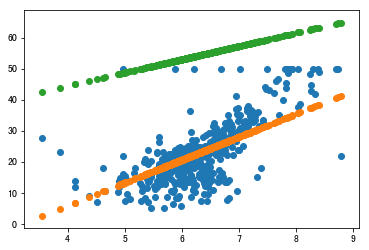

In [167]:
import matplotlib.pyplot as plt
k = 7.405792149238527
b = -23.83319444475163
k_f = 4.27494013911638
b_f = 27.33711078670306

price_for_rand_k_and_b = [price(rm , k , b) for rm in X]
price_for_first_k_and_b = [price(rm , k_f, b_f) for rm in X]
plt.scatter(X, y)
plt.scatter(X, price_for_rand_k_and_b)
plt.scatter(X, price_for_first_k_and_b)
plt.show()

# Edit Distance

In [2]:
def edit_distance(string1, string2):
    
    if len(string1) == 0 : return len(string2)
    if len(string2) == 0 : return len(string1)
    
    sub_str1 = string1[-1]
    sub_str2 = string2[-1]
    
    if sub_str1 == sub_str2:
        distance = edit_distance(string1[:-1], string2[:-1]) + 0
    else:
        distance = edit_distance(string1[:-1], string2[:-1]) + 1
    
    min_edit_distance = min(edit_distance(string1[:-1], string2) + 1, edit_distance(string1, string2[:-1]) + 1, distance )
    
    return min_edit_distance

In [3]:
edit_distance('ABSDF','ABCD')

2

In [4]:
from functools import wraps

In [8]:
edit_result = {}
def distance_calc_once(f):
    @wraps(f)
    def _wrapper(arg1, arg2):
        if (arg1,arg2) not in edit_result:
            edit_result[(arg1,arg2)] = f(arg1,arg2)
            return edit_result[(arg1,arg2)]
        else:
            return edit_result[(arg1,arg2)]
    return _wrapper


In [21]:
@distance_calc_once
def edit_distance(string1, string2):
    
    if len(string1) == 0 : return len(string2)
    if len(string2) == 0 : return len(string1)
    
    sub_str1 = string1[-1]
    sub_str2 = string2[-1]
    
    if sub_str1 == sub_str2:
        distance = edit_distance(string1[:-1], string2[:-1]) + 0
    else:
        distance = edit_distance(string1[:-1], string2[:-1]) + 1
    
    min_edit_distance = min(edit_distance(string1[:-1], string2) + 1, edit_distance(string1, string2[:-1]) + 1, distance )
    
    return min_edit_distance

In [22]:
edit_distance('ABDRDDDASDFQWESDWFWFSDAFQWEFWFSDFS', 'ADFWEEADFQWEFQFQWEFQWFQWFEWEFWEW')

21

0